<a href="https://colab.research.google.com/github/saturnsz/Intelecta_DataMining/blob/main/Hybrid_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy lightgbm pandas numpy scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/train_cleaned.csv")  # ubah path sesuai lokasi kamu
df = df.dropna(subset=['Suhu_Rata_Rata_C'])
target = 'Suhu_Rata_Rata_C'

In [ ]:
df

,ID,Tahun,Nama_Negara,Wilayah,Jenis_Tanaman,Total_Curah_Hujan_mm,Emisi_CO2_JT_Ton,Hasil_Panen_Ton_per_HA,Kejadian_Cuaca_Ekstrim,Akses_Irigasi,Penggunaan_Pestisida_KG_per_HA,Penggunaan_Pupuk_KG_per_HA,Indeks_Kesehatan_Tanah,Strategi_Adaptasi,Suhu_Rata_Rata_C
0,0,2015,USA,South,Soybeans,1658.71000,13.36,2.620,10,74.41,38.97,2.64,46.07,Manajemen Air,20.43
1,1,2022,China,East,Wheat,1478.74000,9.55,0.570,2,36.90,49.99,77.22,88.87,Rotasi Tanaman,-0.33
2,2,2000,India,West Bengal,Fruits,1252.34000,27.37,2.115,3,34.21,2.75,83.94,77.15,Pertanian Organik,12.97
3,3,2008,Nigeria,North West,Sugarcane,209.89000,16.16,4.158,5,91.74,36.80,37.50,73.59,Pertanian Organik,12.81
4,4,1991,Canada,Ontario,Vegetables,1086.67000,3.71,2.430,0,14.72,7.22,28.72,41.90,Tanpa Adaptasi,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7995,2022,Brazil,North,Rice,539.92000,0.85,3.210,6,37.46,37.16,10.14,98.29,Tanaman Tahan Kekeringan,10.37
7996,7996,2007,Australia,Victoria,Sugarcane,2687.50000,14.22,0.640,0,29.75,32.75,80.77,62.92,Pertanian Organik,0.41
7997,7997,2001,China,Central,Rice,2085.65000,14.52,2.590,5,98.85,44.85,28.78,33.65,Manajemen Air,31.23
7998,7998,2024,China,East,Barley,1615.50306,16.44,3.564,2,37.90,9.61,74.70,98.24,Tanaman Tahan Kekeringan,11.63


In [ ]:
num_features = [
    col for col in df.select_dtypes(include=[np.number]).columns
    if col != target
]

X = df[num_features].copy()
y = df[target].copy()

In [ ]:
n_clusters = 3

# Transpose untuk skfuzzy (fit: features x samples)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X.T, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None
)

# Membership matrix (samples x clusters)
u = u.T
membership_cols = [f"FuzzyCluster_{i+1}" for i in range(n_clusters)]
fuzzy_features = pd.DataFrame(u, columns=membership_cols, index=X.index)

# Gabung ke X
X_fuzzy = pd.concat([X, fuzzy_features], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_fuzzy, y, test_size=0.2, random_state=42
)

In [ ]:
model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2852
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 13
[LightGBM] [Info] Start training from score 15.344567
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, max_depth=6,
              n_estimators=500, random_state=42, subsample=0.8)

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.3f}, RMSE: {rmse:.3f}")

MAE: 9.313, RMSE: 11.083


In [ ]:
cluster_profiles = pd.DataFrame(cntr, columns=num_features)
print("\n📘 Pusat cluster fuzzy (profil linguistik):")
print(cluster_profiles)



📘 Pusat cluster fuzzy (profil linguistik):
            ID        Tahun  Total_Curah_Hujan_mm  Emisi_CO2_JT_Ton  \
0  1264.793304  2007.065564           1623.514305         15.293071   
1  3999.689270  2007.036894           1608.017972         15.263952   
2  6736.087011  2006.981407           1613.873587         15.313908   

   Hasil_Panen_Ton_per_HA  Kejadian_Cuaca_Ekstrim  Akses_Irigasi  \
0                2.224505                5.066003      55.327158   
1                2.222412                4.946915      55.057409   
2                2.274131                4.981629      55.610745   

   Penggunaan_Pestisida_KG_per_HA  Penggunaan_Pupuk_KG_per_HA  \
0                       24.560389                   49.712905   
1                       25.494084                   49.957086   
2                       24.607704                   49.706741   

   Indeks_Kesehatan_Tanah  
0               65.052426  
1               64.787487  
2               64.628249  


In [ ]:
imp = pd.DataFrame({
    "Feature": X_fuzzy.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)
print("\n🔥 Feature Importance:")
print(imp.head(15))



🔥 Feature Importance:
                           Feature  Importance
4           Hasil_Panen_Ton_per_HA        1464
3                 Emisi_CO2_JT_Ton        1254
9           Indeks_Kesehatan_Tanah        1203
8       Penggunaan_Pupuk_KG_per_HA        1161
2             Total_Curah_Hujan_mm        1159
6                    Akses_Irigasi        1155
7   Penggunaan_Pestisida_KG_per_HA        1081
11                  FuzzyCluster_2         798
0                               ID         752
10                  FuzzyCluster_1         675
1                            Tahun         672
12                  FuzzyCluster_3         608
5           Kejadian_Cuaca_Ekstrim         456


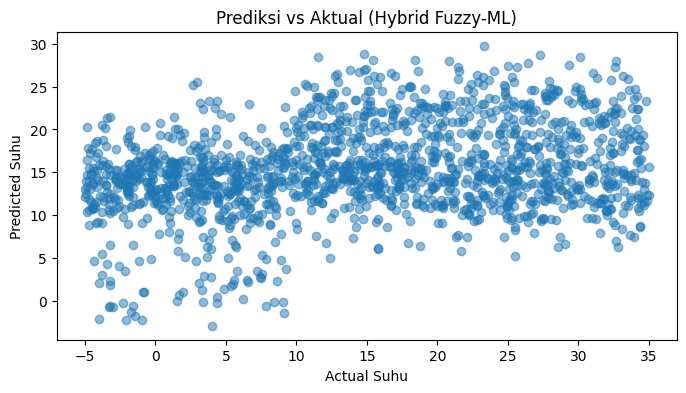

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Suhu")
plt.ylabel("Predicted Suhu")
plt.title("Prediksi vs Aktual (Hybrid Fuzzy-ML)")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prediksi suhu dari model
y_pred = model.predict(X_test)

# Hitung MSE, RMSE, dan MAE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE : {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE : {mae:.3f}")


MSE : 122.839
RMSE: 11.083
MAE : 9.313
